In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define latent dimension for the generator input
latent_dim = 100

# Fetch historical data for the 10-year U.S. Treasury yield (interest rate proxy)
ticker = '^TNX'  # Symbol for the 10-year U.S. Treasury yield (in percentage)
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Use the 'Adj Close' as the interest rate (percentage)
interest_rates = data['Adj Close']

# Normalize the interest rates for GAN
interest_rates_normalized = (interest_rates - interest_rates.mean()) / interest_rates.std()
interest_rates_normalized = interest_rates_normalized.values.reshape(-1, 1)

# Build the Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='tanh'))  # Output is one interest rate value
    return model

# Build the Discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability of real or fake
    return model

# Build the GAN (combining generator and discriminator)
def build_gan(generator, discriminator):
    # Freeze discriminator when training the generator
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator = build_generator(latent_dim)

# The GAN model combines the generator and the discriminator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Hyperparameters
batch_size = 32
epochs = 10000
half_batch = batch_size // 2


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2025-01-05 00:37:32.650088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736055452.698743  210644 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736055452.714753  210644 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 00:37:32.747365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-05 00:37:36.424624: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'


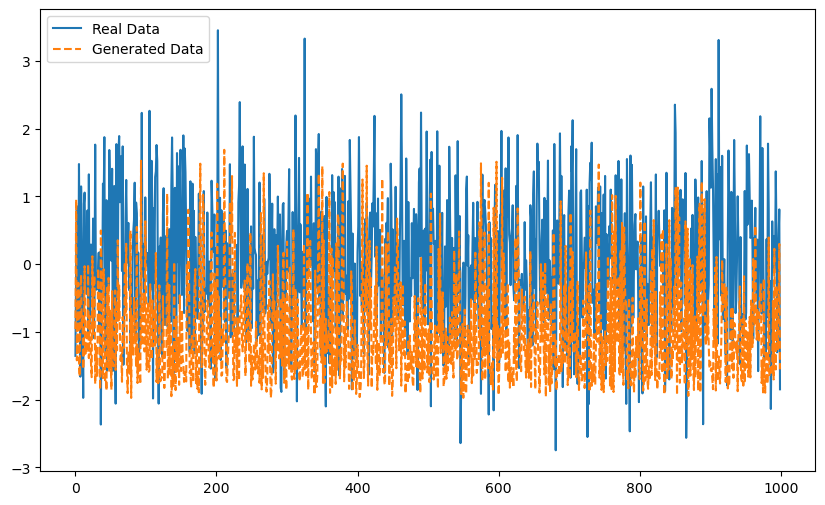

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Set the latent dimension for the generator input
latent_dim = 100

# Build the Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='tanh'))  # Output is a single value (e.g., a number)
    return model

# Build the Discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability of real or fake
    return model

# Build the GAN (combining the generator and the discriminator)
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Initialize the models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator = build_generator(latent_dim)

# Create the GAN by combining the generator and discriminator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Hyperparameters
batch_size = 32
epochs = 101
half_batch = batch_size // 2

# Training loop
for epoch in range(epochs):
    # Generate random data for real (normal distribution) and fake (from generator)
    real_data = np.random.normal(0, 1, (half_batch, 1))  # Random "real" data (for simplicity)
    
    # Check if real_data contains NaN or Inf values
    if np.any(np.isnan(real_data)) or np.any(np.isinf(real_data)):
        print("Warning: real_data contains NaN or Inf")
        continue

    # Noise for generator (input to generator)
    noise = np.random.normal(0, 1, (half_batch, latent_dim))  # Random noise for the generator
    fake_data = generator.predict(noise)  # Generate fake data from noise

    # Ensure fake data is also valid
    if np.any(np.isnan(fake_data)) or np.any(np.isinf(fake_data)):
        print("Warning: fake_data contains NaN or Inf")
        continue

    # Labels for real and fake data
    real_labels = np.ones((half_batch, 1))  # Real data labeled as 1
    fake_labels = np.zeros((half_batch, 1))  # Fake data labeled as 0

    # Train the discriminator with real and fake data
    try:
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    except Exception as e:
        print(f"Error during discriminator training: {e}")
        continue

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Combine losses

    # Train the generator via the GAN (the goal is to fool the discriminator into thinking fake data is real)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Generate random noise
    valid_labels = np.ones((batch_size, 1))  # We want to fool the discriminator into thinking it's real

    try:
        g_loss = gan.train_on_batch(noise, valid_labels)
    except Exception as e:
        print(f"Error during generator training: {e}")
        continue

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]*100}%] [G loss: {g_loss}]")

# Generate synthetic data after training
noise = np.random.normal(0, 1, (1000, latent_dim))  # Generate synthetic samples
synthetic_data = generator.predict(noise)

# Rescale back to the range of real data (adjust as needed based on your data range)
synthetic_data_rescaled = synthetic_data * 2  # Adjust as needed based on your data range

# Plot real vs synthetic data
plt.figure(figsize=(10, 6))
plt.plot(np.random.normal(0, 1, (1000, 1)), label='Real Data')
plt.plot(synthetic_data_rescaled, label='Generated Data', linestyle='dashed')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


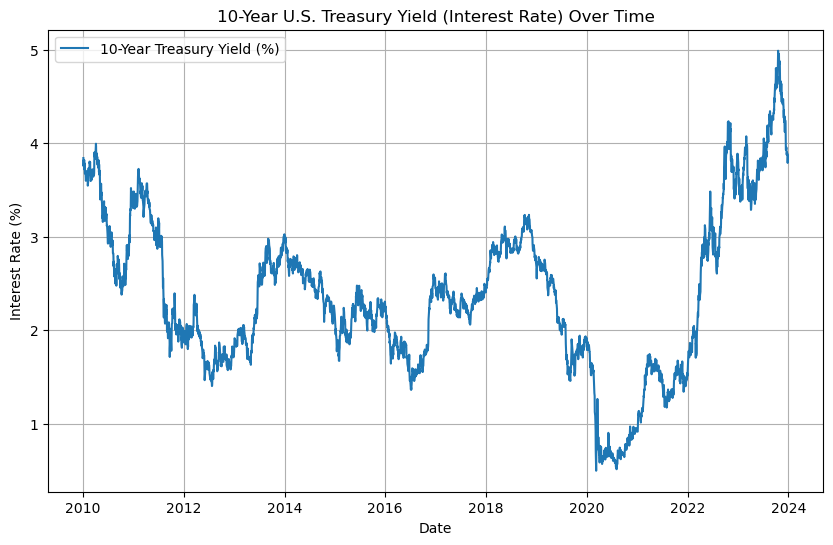

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define latent dimension for the generator input
latent_dim = 100

# Fetch historical data for the 10-year U.S. Treasury yield (interest rate proxy)
ticker = '^TNX'  # Symbol for the 10-year U.S. Treasury yield (in percentage)
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Use the 'Adj Close' as the interest rate (percentage)
interest_rates = data['Adj Close']

# Normalize the interest rates for GAN
interest_rates_normalized = (interest_rates - interest_rates.mean()) / interest_rates.std()
interest_rates_normalized = interest_rates_normalized.values.reshape(-1, 1)

# Plot the interest rates
plt.figure(figsize=(10, 6))
plt.plot(data.index, interest_rates, label="10-Year Treasury Yield (%)")
plt.title('10-Year U.S. Treasury Yield (Interest Rate) Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()
